In [7]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn import preprocessing
%matplotlib inline
sns.set()
sns.set_style('white')

(50, 2)

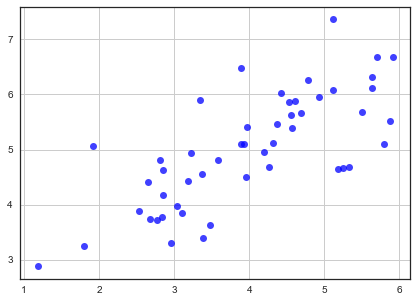

In [17]:
data1 = loadmat('ex7data1.mat')
X = data1['X']
plt.figure(figsize = (7, 5))
plt.plot(X[:, 0], X[:, 1], 'o', color = 'b', alpha=0.75)
plt.grid(True)

In [73]:
def normalizer (x):
    return preprocessing.scale(x)

In [74]:
def covariance (x):
    return np.cov(x)

In [75]:
def SVD (x):
    return sc.linalg.svd(x)

In [148]:
normalX = normalizer(X)
covarianceX = covariance(normalX.T)
U, S, V = SVD(covarianceX)

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [141]:
mean = np.mean(X, axis = 0)

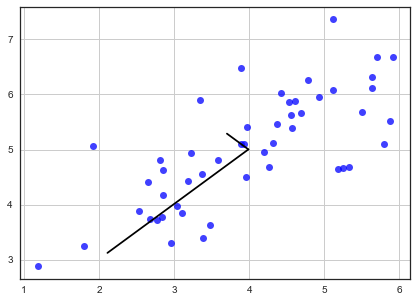

In [142]:
plt.figure(figsize = (7, 5))
plt.plot(X[:, 0], X[:, 1], 'o', color = 'b', alpha=0.75)
plt.grid(True)
plt.plot([mean[0], mean[0] + 1.5 * S[0] * U[0, 0]], [mean[1], mean[1] + 1.5 * S[0] * U[0, 1]], color = 'k')
plt.plot([mean[0], mean[0] + 1.5 * S[1] * U[1, 0]], [mean[1], mean[1] + 1.5 * S[1] * U[1, 1]], color = 'k')

In [153]:
def projectData (x, u, k):
    return np.dot(x, u[:, :k])

In [156]:
projectData(normalX, U, 1)

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0